In [31]:
import numpy as np
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import pandas as pd 

plt.figsize=(20, 8)

In [44]:
deck_sizes = [40, 60, 99]
group_sizes = range(1, 41)
drawn = range(7, 40)
copies = range(0, 10)

list = []

for M in deck_sizes:    
    for n in group_sizes:
        for d in drawn:
            # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html
            rv = hypergeom(M, n, d)

            # cumulative distribution function.
            # r = rv.cdf(copies)
            
            # probability mass function.
            r = rv.pmf(copies)
            
            # survival function
            # r = rv.sf(copies)

            for i, p in enumerate(r):
               list.append([M, n, d, i, p])

df = pd.DataFrame(list, columns =['Deck size', 'Group Size', 'Cards Drawn', 'Found', 'Probability'])
df

,Deck size,Group Size,Cards Drawn,Found,Probability
0,40,1,7,0,0.825000
1,40,1,7,1,0.175000
2,40,1,7,2,0.000000
3,40,1,7,3,0.000000
4,40,1,7,4,0.000000
...,...,...,...,...,...
39595,99,40,39,5,0.000004
39596,99,40,39,6,0.000028
39597,99,40,39,7,0.000164
39598,99,40,39,8,0.000774


<Axes: title={'center': 'Probably of nth card in a 7 card group after drawing x cards in a draft deck'}, xlabel='Cards Drawn'>

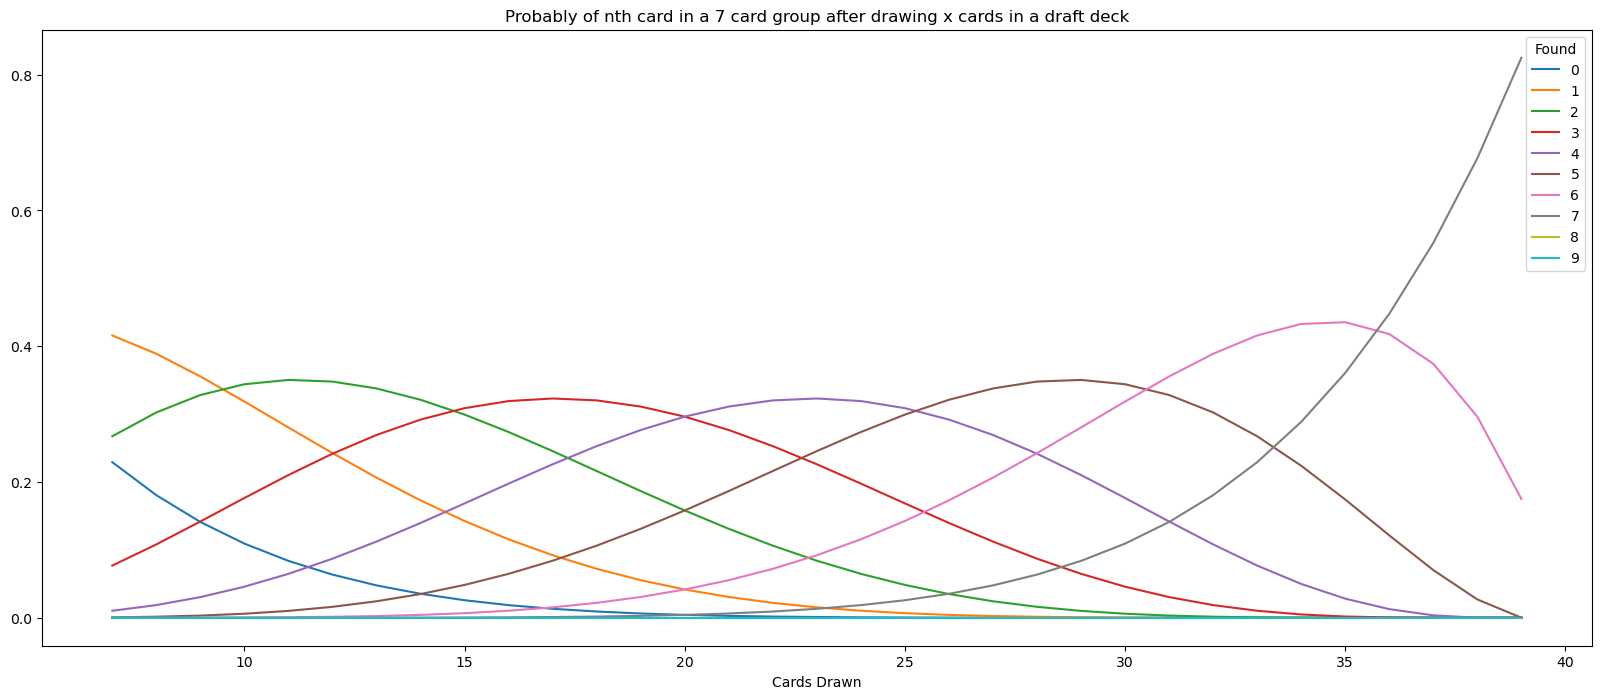

In [50]:
draft_starting_hand = df.loc[df['Deck size'] == 40, :]
draft_starting_hand = draft_starting_hand.loc[draft_starting_hand['Group Size'] == 7, :]
draft_starting_hand = draft_starting_hand.pivot(index='Cards Drawn', columns='Found', values='Probability')
draft_starting_hand.plot(kind='line', figsize=(20, 8), title="Probably of nth card in a 7 card group after drawing x cards in a draft deck")

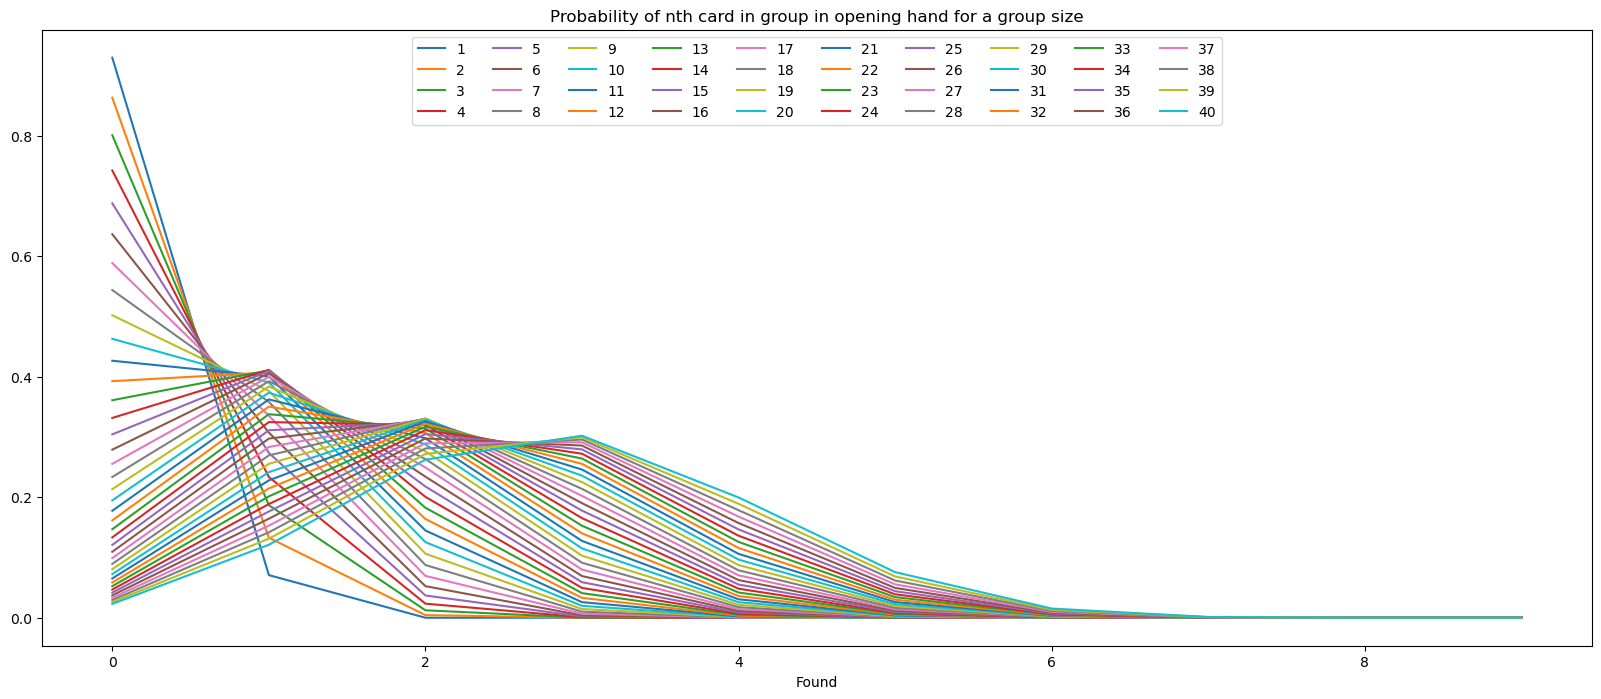

In [65]:
cmd_starting_hand = df.loc[df['Deck size'] == 99, :]
cmd_starting_hand = cmd_starting_hand.loc[cmd_starting_hand['Cards Drawn'] == 7, :]
cmd_starting_hand = cmd_starting_hand.pivot(index='Found', columns='Group Size', values='Probability')
cmd_starting_hand.plot(legend=False, kind='line', figsize=(20, 8), title="Probability of nth card in group in opening hand for a group size").legend(loc='upper center',ncol=10)

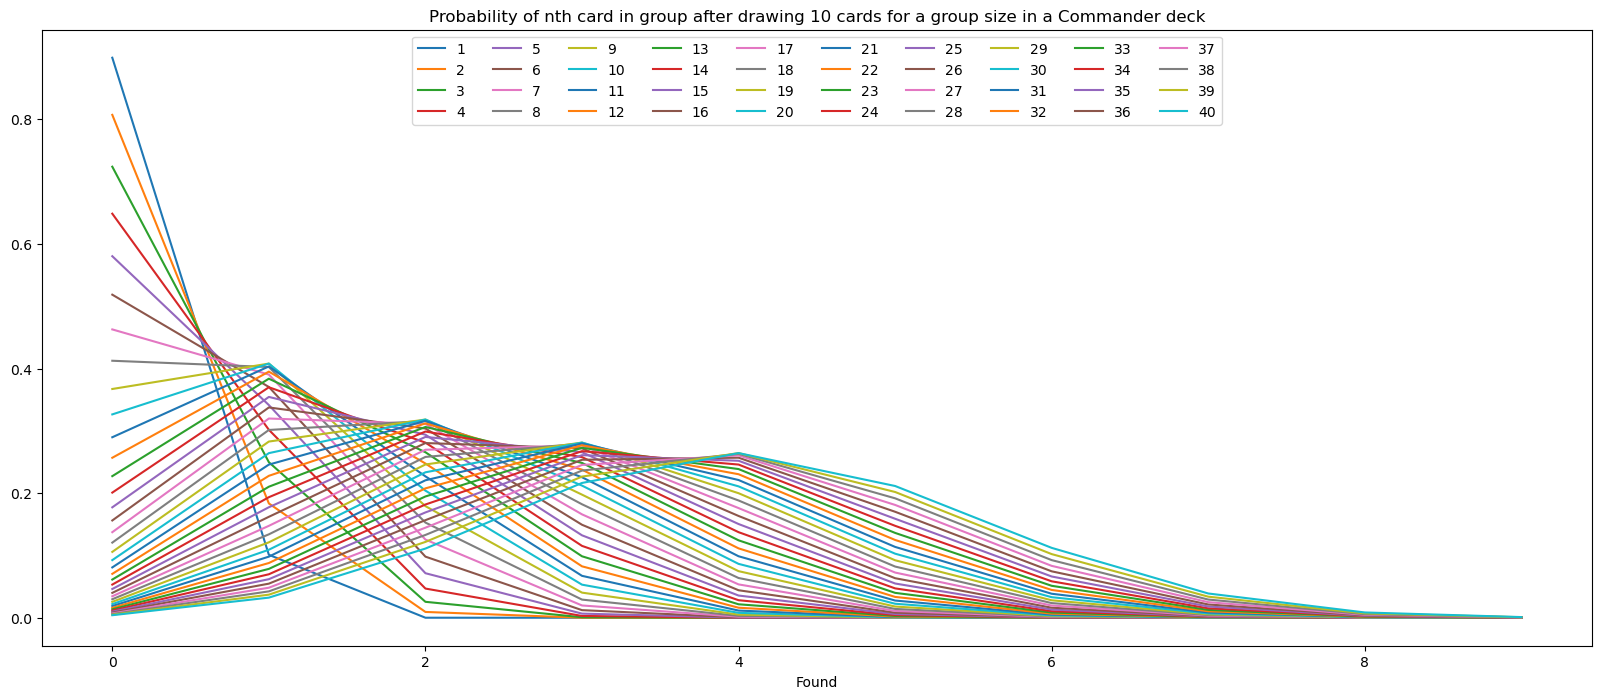

In [67]:
cmd_starting_hand = df.loc[df['Deck size'] == 99, :]
cmd_starting_hand = cmd_starting_hand.loc[cmd_starting_hand['Cards Drawn'] == 10, :]
cmd_starting_hand = cmd_starting_hand.pivot(index='Found', columns='Group Size', values='Probability')
cmd_starting_hand.plot(legend=False, kind='line', figsize=(20, 8), title="Probability of nth card in group after drawing 10 cards for a group size in a Commander deck").legend(loc='upper center',ncol=10)

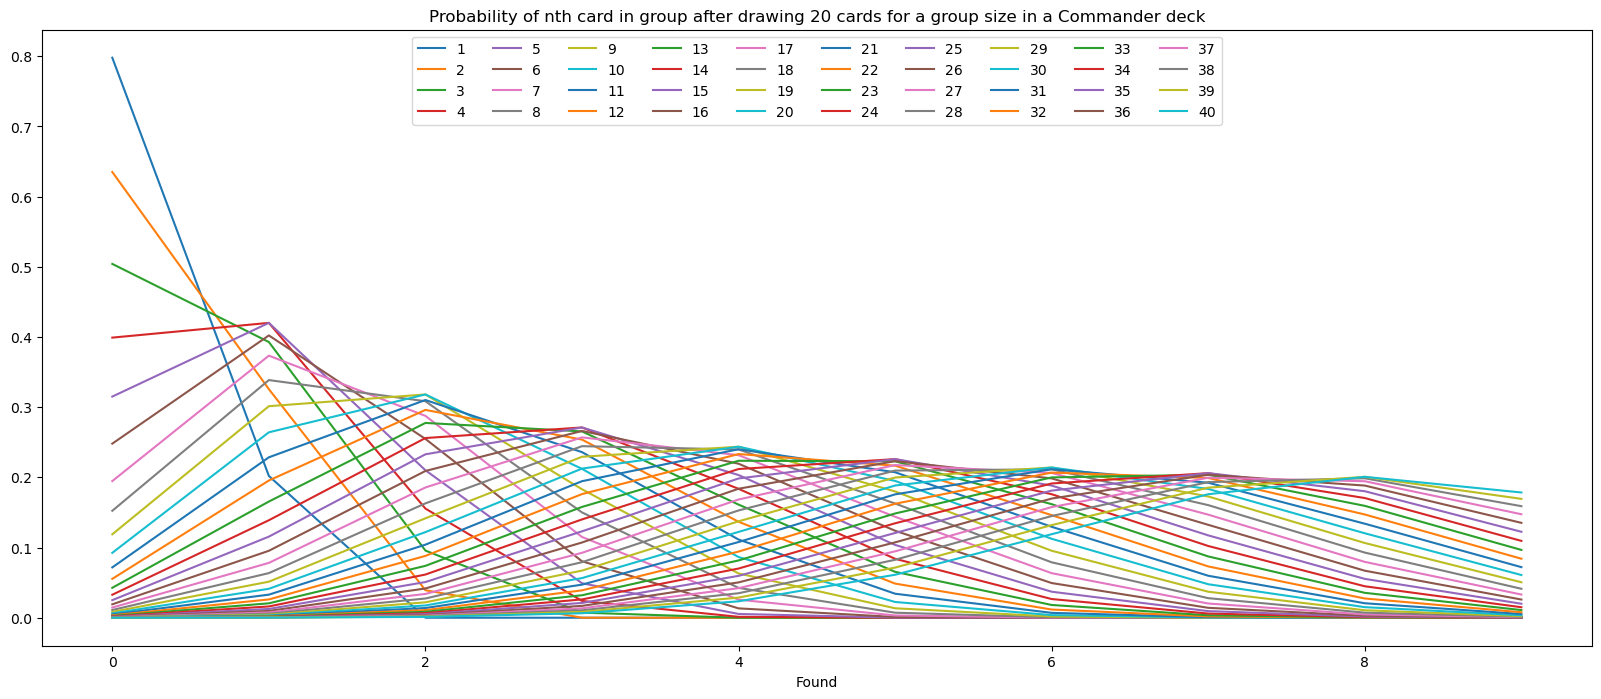

In [68]:
cmd_starting_hand = df.loc[df['Deck size'] == 99, :]
cmd_starting_hand = cmd_starting_hand.loc[cmd_starting_hand['Cards Drawn'] == 20, :]
cmd_starting_hand = cmd_starting_hand.pivot(index='Found', columns='Group Size', values='Probability')
cmd_starting_hand.plot(legend=False, kind='line', figsize=(20, 8), title="Probability of nth card in group after drawing 20 cards for a group size in a Commander deck").legend(loc='upper center',ncol=10)